<a href="https://colab.research.google.com/github/martinpdab/tugasscdl/blob/main/Skenario5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from keras.utils.np_utils import to_categorical

try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
#memakai dataset
URL = 'https://raw.githubusercontent.com/martinpdab/tugasscdl/main/dataset_fixed(1).csv' 
dataframe = pd.read_csv(URL)
dataframe

,TE,HU,RF,WS,PD,ABJ,LAG0,LAG1,LAG2,LAG3,LAG4,LAG5,LAG6,LAG7,LAG8,LAG9,LAG10,LAG11,LAG12,OS
0,26.02,84.74,10.52,0.84,792.86,86.96,1,4,6,4,4,1,4,3,3,5,2,1,4,0
1,26.32,84.64,12.04,0.86,793.45,86.72,3,1,4,6,4,4,1,4,3,3,5,2,1,1
2,26.39,85.00,8.65,0.55,794.04,86.50,0,3,1,4,6,4,4,1,4,3,3,5,2,0
3,26.29,86.17,10.37,0.30,794.63,86.28,1,0,3,1,4,6,4,4,1,4,3,3,5,0
4,26.57,85.61,7.35,0.58,795.22,86.08,0,1,0,3,1,4,6,4,4,1,4,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,24.27,76.87,0.00,1.39,846.18,96.29,1,4,3,3,5,2,1,4,1,1,1,2,3,0
85,25.50,75.73,0.59,1.03,846.59,93.34,4,1,4,3,3,5,2,1,4,1,1,1,2,1
86,26.58,74.94,0.04,1.39,847.01,96.10,4,4,1,4,3,3,5,2,1,4,1,1,1,1
87,26.49,82.28,10.53,1.00,847.42,96.38,6,4,4,1,4,3,3,5,2,1,4,1,1,1


In [4]:
#mengambil kolom period, rf, dan os serta mengacak dataset
data = dataframe[['RF', 'OS']]
data = shuffle(data)
data.head()

,RF,OS
85,0.59,1
13,4.45,0
21,8.37,0
33,6.97,0
44,9.20,0


In [5]:
data.describe()
data.isnull().sum()

RF    0
OS    0
dtype: int64

In [6]:
#Splitting data into feature and label
x = data.drop("OS", 1)
y = data["OS"]

#train-test split 80-20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
print(len(x_train), 'banyak data train')
print(len(x_test), 'banyak data test')

#train-test split 70-30
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3)
print(len(x_train1), 'banyak data train')
print(len(x_test1), 'banyak data test')

71 banyak data train
18 banyak data test
62 banyak data train
27 banyak data test


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


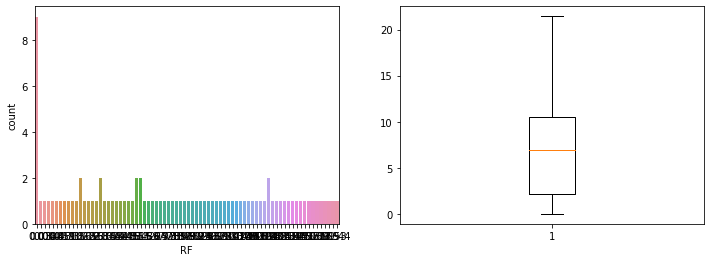

In [7]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(data['RF'])
f.add_subplot(1,2,2)
plt.boxplot(data['RF'])
plt.show()

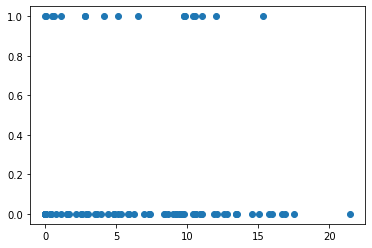

In [8]:
plt.scatter(data['RF'], data['OS'])
plt.show()

In [9]:
model = tf.keras.Sequential([
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=10, verbose=True)

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 0.6589 - accuracy: 0.7183 - val_loss: 1.3145 - val_accuracy: 0.5556
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5661 - accuracy: 0.8592 - val_loss: 1.2838 - val_accuracy: 0.5556
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4870 - accuracy: 0.8592 - val_loss: 1.0607 - val_accuracy: 0.5556
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5184 - accuracy: 0.8592 - val_loss: 0.9139 - val_accuracy: 0.5556
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5059 - accuracy: 0.8451 - val_loss: 0.8226 - val_accuracy: 0.5556
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4214 - accuracy: 0.8592 - val_loss: 0.8715 - val_accuracy: 0.5556
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 0.4288 - accuracy: 0.8451 - val_loss: 0.9221 - val_accuracy: 0.5556
Epoch 8/100
8/8 [=========

In [11]:
history1=model.fit(x_train1, y_train1, validation_data=(x_test1, y_test1), epochs=100, batch_size=10, verbose=True)

Epoch 1/100
7/7 [==============================] - 0s 12ms/step - loss: 0.6068 - accuracy: 0.7742 - val_loss: 0.4008 - val_accuracy: 0.8519
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5164 - accuracy: 0.7742 - val_loss: 0.4119 - val_accuracy: 0.8519
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5990 - accuracy: 0.7742 - val_loss: 0.4535 - val_accuracy: 0.8519
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5392 - accuracy: 0.7742 - val_loss: 0.4823 - val_accuracy: 0.8519
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5814 - accuracy: 0.7742 - val_loss: 0.4810 - val_accuracy: 0.8519
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 0.5674 - accuracy: 0.7742 - val_loss: 0.4851 - val_accuracy: 0.8519
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.5822 - accuracy: 0.7742 - val_loss: 0.4867 - val_accuracy: 0.8519
Epoch 8/100
7/7 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


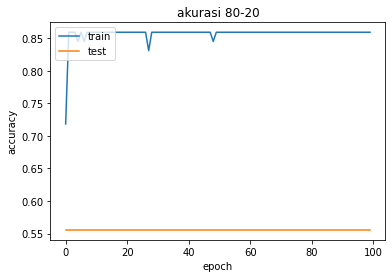

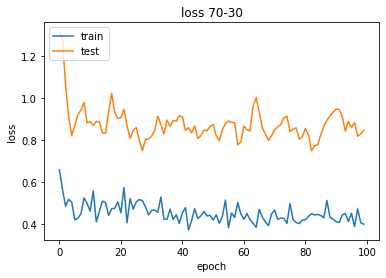

In [12]:
import matplotlib.pyplot as plt

print(history.history.keys())
#history 80-20
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('akurasi 80-20')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss 70-30')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

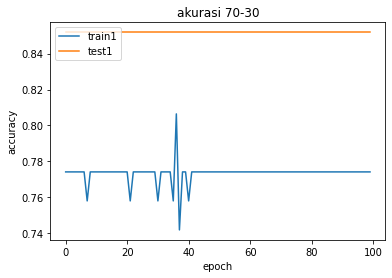

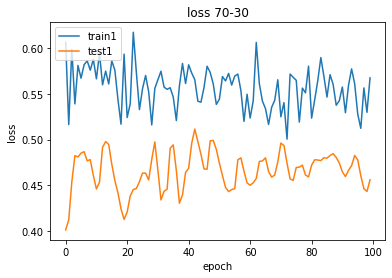

In [13]:
#70-30
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('akurasi 70-30')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train1', 'test1'], loc='upper left')
plt.show()
#loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('loss 70-30')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train1', 'test1'], loc='upper left')
plt.show()